In [67]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt



Keras has 60K training images and 10K testing images


In [69]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Reshape and normalize

In [70]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [71]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

In [72]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [73]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [74]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Epoch 1/10
600/600 - 5s - loss: 0.2396 - accuracy: 0.9298 - val_loss: 0.1317 - val_accuracy: 0.9587
Epoch 2/10
600/600 - 6s - loss: 0.0962 - accuracy: 0.9715 - val_loss: 0.0842 - val_accuracy: 0.9746
Epoch 3/10
600/600 - 7s - loss: 0.0634 - accuracy: 0.9809 - val_loss: 0.0750 - val_accuracy: 0.9766
Epoch 4/10
600/600 - 4s - loss: 0.0468 - accuracy: 0.9864 - val_loss: 0.0755 - val_accuracy: 0.9780
Epoch 5/10
600/600 - 4s - loss: 0.0339 - accuracy: 0.9899 - val_loss: 0.0709 - val_accuracy: 0.9780
Epoch 6/10
600/600 - 4s - loss: 0.0270 - accuracy: 0.9915 - val_loss: 0.0650 - val_accuracy: 0.9809
Epoch 7/10
600/600 - 4s - loss: 0.0202 - accuracy: 0.9938 - val_loss: 0.0757 - val_accuracy: 0.9796
Epoch 8/10
600/600 - 4s - loss: 0.0164 - accuracy: 0.9952 - val_loss: 0.0679 - val_accuracy: 0.9827
Epoch 9/10
600/600 - 4s - loss: 0.0127 - accuracy: 0.9962 - val_loss: 0.0691 - val_accuracy: 0.9821
Epoch 10/10
600/600 - 4s - loss: 0.0094 - accuracy: 0.9972 - val_loss: 0.0864 - val_accuracy: 0.9797

In [76]:
loss, accuracy = model.evaluate(test_images,  test_labels, verbose=2)


313/313 - 1s - loss: 0.0864 - accuracy: 0.9797


Predict image : 5233

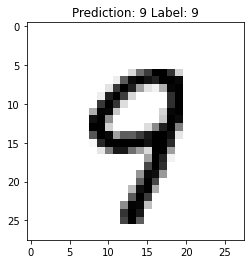

In [77]:
    test_image = test_images[5233,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[5233].argmax()
    plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
    plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()

Predict image 3245

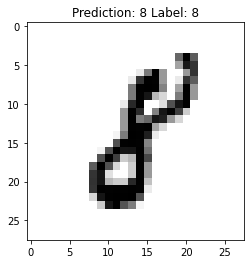

In [78]:
test_image = test_images[3245,:].reshape(1,784)
predicted_cat = model.predict(test_image).argmax()
label = test_labels[3245].argmax()
plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
plt.show()

In [79]:
model.save('image_classifier_model/1') 


INFO:tensorflow:Assets written to: image_classifier_model/1/assets


In [80]:
!ls

image_classifier_model	mnistmodel.zip	sample_data


In [81]:
!ls image_classifier_model/1


assets	saved_model.pb	variables


In [82]:
!ls image_classifier_model/1/assets

In [83]:
!ls image_classifier_model/1/variables

variables.data-00000-of-00001  variables.index


In [85]:
from tensorflow.keras.models import load_model


In [86]:
mnist_model = load_model('image_classifier_model/1/')


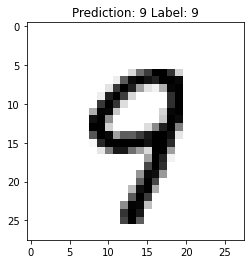

In [87]:
test_image = test_images[5233,:].reshape(1,784)
predicted_cat = mnist_model.predict(test_image).argmax()
label = test_labels[5233].argmax()
plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
plt.show()

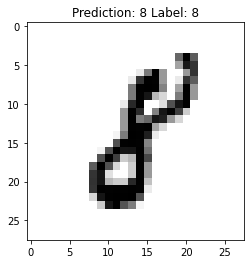

In [88]:
test_image = test_images[3245,:].reshape(1,784)
predicted_cat = model.predict(test_image).argmax()
label = test_labels[3245].argmax()
plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
plt.show()

In [91]:
!ls


image_classifier_model	sample_data


In [92]:
!zip -r mnistmodel.zip image_classifier_model	

  adding: image_classifier_model/ (stored 0%)
  adding: image_classifier_model/1/ (stored 0%)
  adding: image_classifier_model/1/assets/ (stored 0%)
  adding: image_classifier_model/1/saved_model.pb (deflated 86%)
  adding: image_classifier_model/1/variables/ (stored 0%)
  adding: image_classifier_model/1/variables/variables.index (deflated 57%)
  adding: image_classifier_model/1/variables/variables.data-00000-of-00001 (deflated 12%)


In [93]:
!ls

image_classifier_model	mnistmodel.zip	sample_data


In [94]:
from google.colab import files
files.download('mnistmodel.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>